## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
import pandas as pd
import numpy as np

In [4]:
import pymongo

client = pymongo.MongoClient("192.168.10.240", 27017)
db = client['AI_LKJ']
collection_data_tour_pass_visitor = db['data_tour_pass_visitor']

data_tour_pass_visitor = collection_data_tour_pass_visitor.find()
df_tourpass_visitor = pd.DataFrame(data_tour_pass_visitor)

In [5]:
df_tourpass_visitor

,_id,date,visitor,region
0,664162f32581fd20a9efc7a8,201901,46600000,경기
1,664162f32581fd20a9efc7a9,201902,43800000,경기
2,664162f32581fd20a9efc7aa,201903,61439672,경기
3,664162f32581fd20a9efc7ab,201904,45141490,경기
4,664162f32581fd20a9efc7ac,201905,53300448,경기
...,...,...,...,...
235,664162f32581fd20a9efc893,202308,5982112,제주
236,664162f32581fd20a9efc894,202309,4788081,제주
237,664162f32581fd20a9efc895,202310,5614039,제주
238,664162f32581fd20a9efc896,202311,4672499,제주


In [6]:
df_tourpass_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      240 non-null    object
 1   date     240 non-null    int64 
 2   visitor  240 non-null    int64 
 3   region   240 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.6+ KB


In [7]:
df_tourpass_visitor['date'] = pd.to_datetime(df_tourpass_visitor['date'], format="%Y%m")
df_tourpass_visitor['date_year'] = df_tourpass_visitor['date'].dt.year
df_tourpass_visitor['date_month'] = df_tourpass_visitor['date'].dt.month

In [8]:
df_tourpass_visitor

,_id,date,visitor,region,date_year,date_month
0,664162f32581fd20a9efc7a8,2019-01-01,46600000,경기,2019,1
1,664162f32581fd20a9efc7a9,2019-02-01,43800000,경기,2019,2
2,664162f32581fd20a9efc7aa,2019-03-01,61439672,경기,2019,3
3,664162f32581fd20a9efc7ab,2019-04-01,45141490,경기,2019,4
4,664162f32581fd20a9efc7ac,2019-05-01,53300448,경기,2019,5
...,...,...,...,...,...,...
235,664162f32581fd20a9efc893,2023-08-01,5982112,제주,2023,8
236,664162f32581fd20a9efc894,2023-09-01,4788081,제주,2023,9
237,664162f32581fd20a9efc895,2023-10-01,5614039,제주,2023,10
238,664162f32581fd20a9efc896,2023-11-01,4672499,제주,2023,11


## 전체 데이터 확인

- 투어패스가 등장한 시점
- 제주 : 2021년 3월
- 부산 : 2022년 2월
- 강원 : 2023년 7월
- 경기 : 2023년 7월

In [9]:
df_tourpass_visitor

,_id,date,visitor,region,date_year,date_month
0,664162f32581fd20a9efc7a8,2019-01-01,46600000,경기,2019,1
1,664162f32581fd20a9efc7a9,2019-02-01,43800000,경기,2019,2
2,664162f32581fd20a9efc7aa,2019-03-01,61439672,경기,2019,3
3,664162f32581fd20a9efc7ab,2019-04-01,45141490,경기,2019,4
4,664162f32581fd20a9efc7ac,2019-05-01,53300448,경기,2019,5
...,...,...,...,...,...,...
235,664162f32581fd20a9efc893,2023-08-01,5982112,제주,2023,8
236,664162f32581fd20a9efc894,2023-09-01,4788081,제주,2023,9
237,664162f32581fd20a9efc895,2023-10-01,5614039,제주,2023,10
238,664162f32581fd20a9efc896,2023-11-01,4672499,제주,2023,11


In [10]:
grouped = df_tourpass_visitor.query("region == '제주'")
grouped2 = df_tourpass_visitor.query("region == '제주' and date_month == 3")

highlight_date = pd.to_datetime('2021-03-01')
highlight_data = grouped[grouped['date'] == highlight_date]

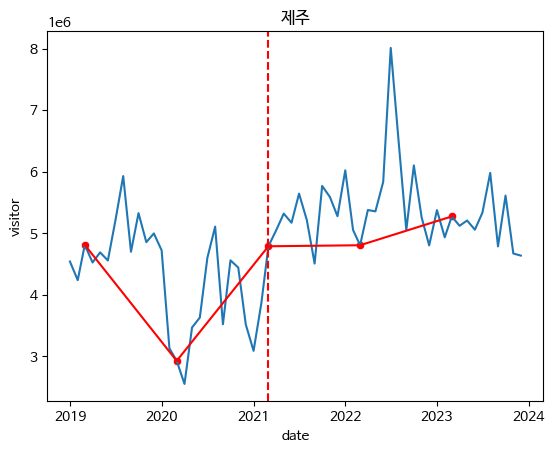

In [11]:
plt.title("제주")

sns.lineplot(data=grouped, x='date', y='visitor')
sns.lineplot(data=grouped2, x='date', y='visitor', color='red')
sns.scatterplot(data=grouped2, x='date', y='visitor', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [12]:
grouped = df_tourpass_visitor.query("region == '부산'")
grouped2 = df_tourpass_visitor.query("region == '부산' and date_month == 2")

highlight_date = pd.to_datetime('2022-02-01')
highlight_data = grouped[grouped['date'] == highlight_date]

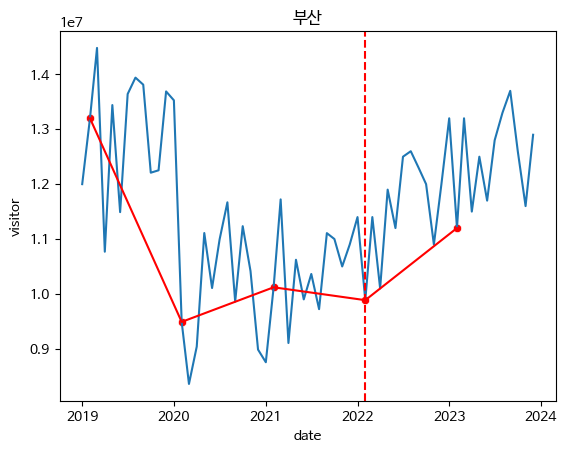

In [13]:
plt.title("부산")

sns.lineplot(data=grouped, x='date', y='visitor')
sns.lineplot(data=grouped2, x='date', y='visitor', color='red')
sns.scatterplot(data=grouped2, x='date', y='visitor', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [14]:
grouped = df_tourpass_visitor.query("region == '강원'")
grouped2 = df_tourpass_visitor.query("region == '강원' and date_month == 7")

highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

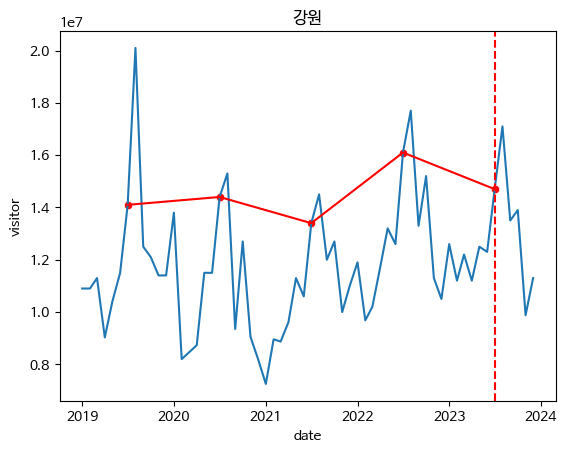

In [15]:
plt.title("강원")

sns.lineplot(data=grouped, x='date', y='visitor')
sns.lineplot(data=grouped2, x='date', y='visitor', color='red')
sns.scatterplot(data=grouped2, x='date', y='visitor', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [16]:
grouped = df_tourpass_visitor.query("region == '경기'")
grouped2 = df_tourpass_visitor.query("region == '경기' and date_month == 7")

highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

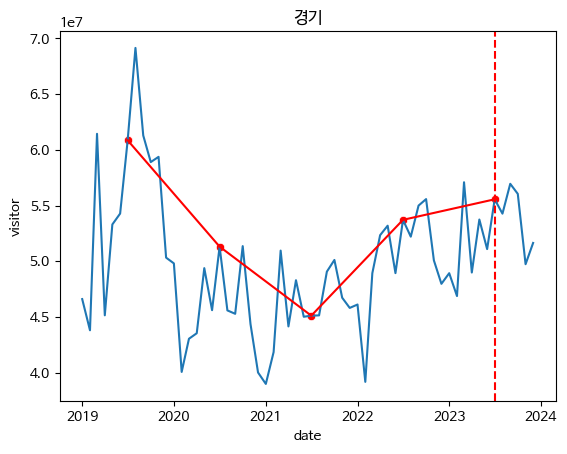

In [17]:
plt.title("경기")

sns.lineplot(data=grouped, x='date', y='visitor')
sns.lineplot(data=grouped2, x='date', y='visitor', color='red')
sns.scatterplot(data=grouped2, x='date', y='visitor', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

- 공통적으로 2020년부터 방문자 수가 급격하게 떨어짐 -> 코로나 영향일 것이라 예상
- 대체로 투어패스 도입 이전보다 이후에 방문자 수가 증가했다(증가할 것이다)고 볼 수 있으나 다른 요인을 생각하지 않을 수 없음(코로나 등)
- 강원과 경기의 경우 투어패스 도입이 2023년이라 이후 데이터가 부족하여 분석에 어려움이 있음

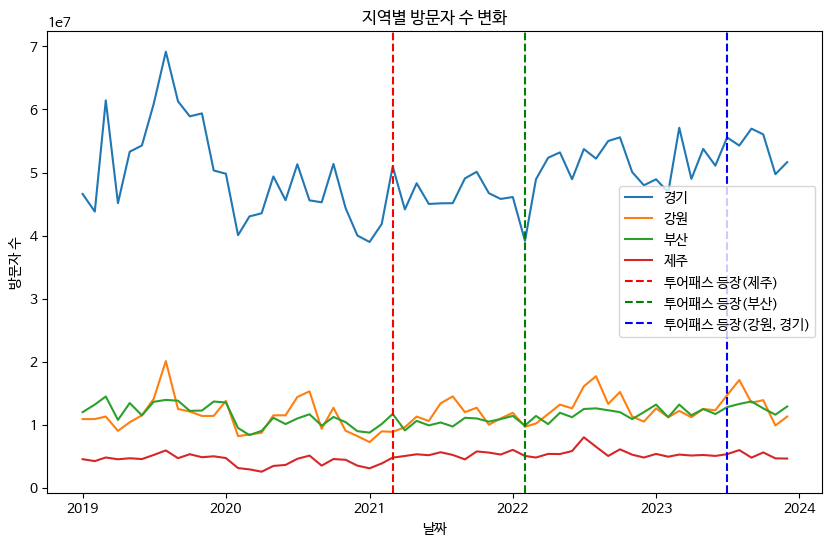

In [30]:
from pandas.plotting import register_matplotlib_converters

# 다중 축을 사용 그래프를 생성
fig, ax = plt.subplots(figsize=(10, 6))
# 지역별 방문자 수
sns.lineplot(data=df_tourpass_visitor, x='date', y='visitor', hue='region', ax=ax)
# 투어패스 도입 시점
ax.axvline(pd.to_datetime('2021-03-01'), color='r', linestyle='--', label='투어패스 등장(제주)')
ax.axvline(pd.to_datetime('2022-02-01'), color='g', linestyle='--', label='투어패스 등장(부산)')
ax.axvline(pd.to_datetime('2023-07-01'), color='b', linestyle='--', label='투어패스 등장(강원, 경기)')

plt.title('지역별 방문자 수 변화')
plt.xlabel('날짜')
plt.ylabel('방문자 수')
plt.legend()
plt.show()